In [3]:
#import all relevant libraries here.
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

# from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [14]:
from contextlib import contextmanager
import time
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

In [3]:
X.shape ## 300 rows, 2 columns

(300, 2)

In [4]:
len(X)

300

In [80]:
# def KMEANS(X_array):
n_clusters = 4
centroids = None
y_pred_kmeans = None 
iteration_count = 11

for i in range(iteration_count): # i = 0,1,2,3,4
    centroids = np.random.randn(n_clusters, X.shape[1]) # generates 4 rows,2cols at random

    for iter_ in range(50):
        dist_array = np.zeros((X.shape[0],n_clusters))  # array(300 rows, 4 cols of zeros)

        for i,cntrod in enumerate(centroids,0): # returns idx and each rows inside centroids1-->[][]
            dist_array[:,i] = np.sqrt((np.square(X-cntrod)).sum(axis=1))

        y_pred_kmeans = np.argmin(dist_array,axis=1) # cluster column in array X

        for c_no in range(n_clusters): # c_no=0,1,2,3
            centroids[c_no] = X[y_pred_kmeans==c_no,:].mean(axis=0) # verticle axis


In [86]:
(dist_array) # each value is the dist between that particular datapoint and the respective centroid

array([[2.51886398, 1.7094301 , 2.28549887, 6.03646705],
       [4.58199238, 7.37095923, 3.81169814, 0.34643087],
       [3.55708828, 4.31202584, 0.71089317, 3.66567611],
       ...,
       [2.64602851, 3.97975937, 0.52394355, 3.69298946],
       [5.33123667, 7.10882992, 3.42159694, 1.74312426],
       [0.22240389, 4.21724302, 3.2095226 , 5.02146555]])

In [83]:
for i,cntrod in enumerate(centroids,0):
    print(i,cntrod)

0 [-1.58438467  2.83081263]
1 [1.98258281 0.86771314]
2 [0.94973532 4.41906906]
3 [-1.37324398  7.75368871]


In [88]:
np.argmin(dist_array[0:1],axis=1)

array([1])

In [90]:
X[y_pred_kmeans==3,:]#.mean(axis=0) # vertical axis

array([[-1.4136581 ,  7.40962324],
       [-1.01861632,  7.81491465],
       [-0.20493217,  8.43209665],
       [-0.71109961,  8.66043846],
       [-2.67000792,  8.3538914 ]])

In [91]:
centroids[3]

array([-1.37324398,  7.75368871])

# OOPS KMEANS

In [4]:
class KMeans:
    def __init__(self,n_clusters, tolerance=0.001,max_iteration=300):
        self.n_clusters = n_clusters
        self.tolerance = tolerance
        self.max_iteration = max_iteration
        # self.centroids = None
        self.y_kmeans = None

    def fit(self,X,seeds=2):
        ob=np.random.RandomState(seeds)
        for r in range(10):
            optimized = False
            self.centroids = ob.randn(self.n_clusters, X.shape[1])
        
            for iter_ in range(self.max_iteration):
                dist_array = np.zeros((X.shape[0], self.n_clusters))

                for i,cntrod in enumerate(self.centroids,0): # 1[][]
                    dist_array[:,i] = np.sqrt((np.square(X-cntrod)).sum(axis=1))

                self.y_kmeans = np.argmin(dist_array,axis=1)

                for c_no in range(self.n_clusters):
                    try:
                        self.centroids[c_no] = X[self.y_kmeans==c_no, :].mean(axis=0)
                    except:
                        optimized=True
                        break
            if optimized:
                continue
            tol = 0
            for cntrod in self.centroids:
                tol+= np.sqrt(np.mean(np.square(X-cntrod)))
            if tol > self.tolerance:
                self.tolerance = tol
                # self.centroids = centroids
                return self.centroids

    def predict(self,X):

            dist_array = np.zeros((X.shape[0], self.n_clusters))

            for i,cntrod in enumerate(self.centroids,0):
                dist_array[:,i] = np.sqrt((np.square(X-cntrod)).sum(axis=1))

            self.y_kmeans = np.argmin(dist_array,axis=1)
            return self.y_kmeans
            



In [66]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

In [67]:
kmeans = KMeans(n_clusters=4)
model = kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [68]:
y_kmeans

array([2, 1, 3, 1, 2, 2, 0, 3, 1, 1, 0, 1, 3, 1, 2, 3, 3, 2, 0, 0, 2, 2,
       3, 0, 0, 3, 2, 3, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 3, 0, 3, 3,
       0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 3, 1, 0, 0, 0,
       1, 2, 1, 0, 3, 0, 1, 0, 0, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 2, 1, 0, 0, 3, 2, 2, 3, 0, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3,
       0, 0, 2, 1, 2, 3, 1, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 3, 1, 1, 0, 3, 0, 3, 0, 1, 3, 1, 1, 1, 3, 1, 3,
       2, 0, 1, 0, 2, 3, 1, 3, 3, 2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 3, 0, 1,
       2, 2, 3, 0, 2, 3, 0, 0, 3, 3, 3, 3, 2, 1, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 1, 3, 0, 2, 0, 3, 1, 0, 1, 3, 1, 3, 0, 3, 3, 1, 0, 0, 2, 2, 3,
       1, 2, 2, 0, 2, 0, 3, 1, 1, 3, 3, 1, 3, 2, 0, 3, 2, 0, 1, 0, 2, 3,
       2, 1, 1, 1, 1, 0, 0, 1, 3, 0, 2, 3, 0, 0, 0, 2, 2, 1, 3, 3, 0, 2,
       1, 0, 3, 1, 3, 2, 2, 0, 0, 3, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2,
       1, 0, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 0])

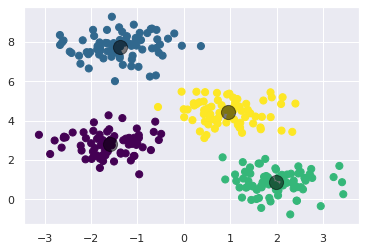

In [69]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50,cmap='viridis')
# centers = kmeans.cluster_centers_
centroids=kmeans.centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5);

# BONUS Dataset: Tatooine Map
#### Now, time to do it for any dimension of n_features of X

In [12]:
# Generate sample data with 5 features
n_samples = 4000
n_components = 4
n_features = 5

X_new, y_true_new = make_blobs(n_samples=n_samples,
                       n_features = n_features,
                       centers=n_components,
                       cluster_std=0.60,
                       random_state=0)
X_new = X_new[:, ::-1]

df= pd.DataFrame(X_new)
# df

Execution - done in 3s


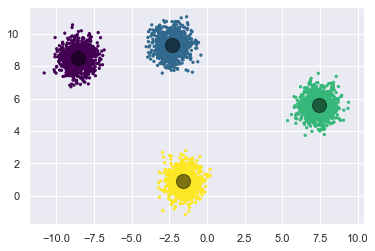

In [16]:
with timer("Execution"):    
    kmeans_new = KMeans(n_clusters=4)
    model_new = kmeans_new.fit(X_new)
    y_kmeans_new = kmeans_new.predict(X_new)

    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_kmeans_new, s=5, cmap='viridis')
    centroids_new = kmeans_new.centroids
    plt.scatter(centroids_new[:, 0], centroids_new[:, 1], c='black', s=200, alpha=0.5);

In [72]:
kmeans_new.centroids

array([[-8.56310668,  8.48371073,  1.37289887,  0.59041155,  5.83953874],
       [-2.33516784,  9.29195226,  7.80724118, -1.28401233,  2.90403444],
       [ 7.3959297 ,  5.57285926,  6.64861867, -9.59332317, -8.21547147],
       [-1.56369008,  0.89188882,  2.03997632,  4.29030639,  0.9951018 ]])

Execution - done in 1s


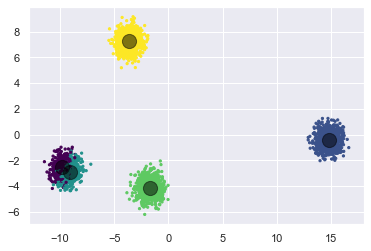

In [25]:
from sklearn.decomposition import PCA

with timer("Execution"): 
    pca = PCA(n_components=4)
    X_pca = pca.fit_transform(X_new)

    kmeans_pca = KMeans(n_clusters=5)
    model_pca = kmeans_pca.fit(X_pca)
    y_kmeans_pca = kmeans_pca.predict(X_pca)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_pca, s=5, cmap='viridis')
    centroids_pca = kmeans_pca.centroids
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', s=200, alpha=0.5);

In [40]:
# Generate sample data with 5 features
n_samples = 4000
n_components_1 = 4
n_features = 5

X_new, y_true_new = make_blobs(n_samples=n_samples,
                       n_features = n_features,
                       centers=n_components_1,
                       cluster_std=0.60,
                       random_state=0)
X_new = X_new[:, ::-1]

df= pd.DataFrame(X_new)

#####################################
from sklearn.decomposition import PCA

n_components = 5#X_new.shape[1]
# Running PCA with all the components
pca = PCA(n_components = n_components, random_state=453)
X_pca = pca.fit_transform(X_new)

# Calculating 95% Variance
total_variance = sum(pca.explained_variance_)
print(f"Total Variance in our dataset:{total_variance}")
# Lets suppose we want 95% variance
var_95 = total_variance * 0.95
print(f"The 95% variance we want to have is: {var_95}")
print("")

# Creating a dataframe with the components and expalained_variance
a = zip(range(0,n_components), np.cumsum(pca.explained_variance_))
a = pd.DataFrame(a, columns=["PCA_n_compnents", "Explained Variance"])
a

Total Variance in our dataset:106.2997337507925
The 95% variance we want to have is: 100.98474706325287



,PCA_n_compnents,Explained Variance
0,0,81.088405
1,1,100.829134
2,2,105.610411
3,3,105.960808
4,4,106.299734


Text(0, 0.5, 'cumulative explained variance')

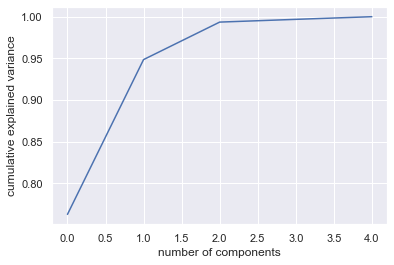

In [31]:
pca = PCA().fit(X_new)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [34]:
print("Variance explain with 1 n_compononets: ", sum(a["Explained Variance"][0:1]))
print("Variance explain with 2 n_compononets: ", sum(a["Explained Variance"][0:2]))
print("Variance explain with 3 n_compononets: ", sum(a["Explained Variance"][0:3]))
print("Variance explain with 4 n_compononets: ", sum(a["Explained Variance"][0:4]))
print("Variance explain with 5 n_compononets: ", sum(a["Explained Variance"][0:5]))

Variance explain with 1 n_compononets:  81.08840452724604
Variance explain with 2 n_compononets:  100.82913372476793
Variance explain with 3 n_compononets:  105.61041100145428
Variance explain with 4 n_compononets:  105.96080824719091
Variance explain with 5 n_compononets:  106.2997337507925


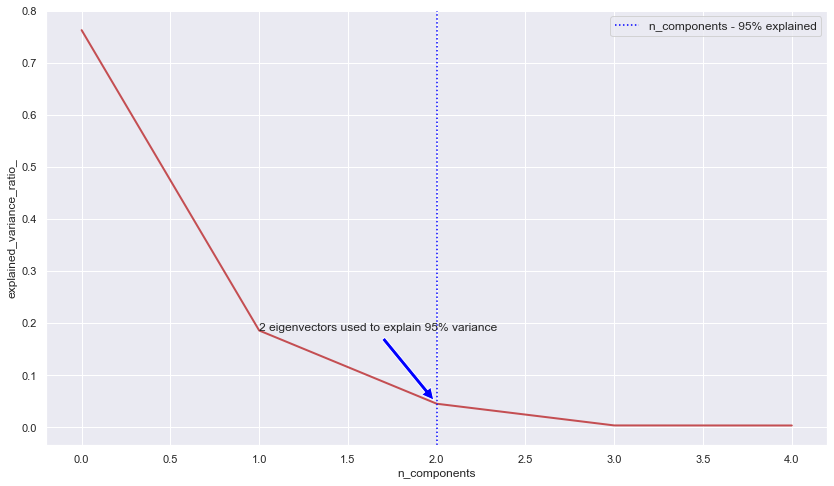

In [44]:
# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

# Plotting line with 95% e.v.
plt.axvline(2,linestyle=':', label='n_components - 95% explained', c ="blue") # x vertical line
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('2 eigenvectors used to explain 95% variance', xy=(2, pca.explained_variance_ratio_[2]), 
             xytext=(1, pca.explained_variance_ratio_[1]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()